# Fitting an RTS histogram and extracting the tunnel rates

The core function for this example is `tunnelrates_RTS` from `qtt.algorithms.random_telegraph_signal`. The function takes a time-resolved dataset with a random telegraph signal and fits the histogram of signal values to a double-gaussian function, from which the SNR based visibility of the signal can be obtained. It then searches dataset for the RTS transitions (up and down) and from the histograms of transitions, calculates the tunnel rates for both transitions. 

In [4]:
import os
import qcodes
import qtt

%matplotlib inline
import numpy as np
from qtt.algorithms.random_telegraph_signal import tunnelrates_RTS

Load a sample dataset with a time-resolved trace with RTS:

In [2]:
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)
dataset = qtt.data.load_dataset(os.path.join('2018-08-31', '19-05-18_qtt_save_segments'))

rtsdata = dataset.measured.ndarray
samplerate = 1 / (dataset.time[1] - dataset.time[0])

Run the core function and obtain the tunnel rates:

Fit parameters double gaussian:
 mean down: -0.130 counts, mean up:-0.097 counts, std down: 0.010 counts, std up:0.010 counts
Separation between peaks gaussians: 1.653 std
Split between two levels: -0.114
 _create_histogram level down: nbins 70, 19
 _create_histogram level up: nbins 35, 26
Tunnel rate down: 94.3 kHz
Tunnel rate up: 72.1 kHz


(94.25667725461247,
 72.09803065897941,
 {'plunger value': [],
  'sampling rate': 7812630.000000018,
  'fit parameters double gaussian': array([ 7.02696001e+04,  2.24117972e+04,  9.90102583e-03,  1.03982311e-02,
         -1.30233303e-01, -9.66862774e-02]),
  'separations between peaks gaussians': 1.6526233322383008,
  'split between the two levels': -0.11387063679926412,
  'down_segments': {'mean': 9.850112516891924e-06,
   'p50': 5.759904155194844e-06,
   'mean_filtered': 76.95528455284553},
  'up_segments': {'mean': 3.696660340979315e-06,
   'p50': 7.67987220692646e-07,
   'mean_filtered': 28.88063947974529},
  'tunnelrate_down_to_up': 101521.68295388539,
  'tunnelrate_up_to_down': 270514.4394562042,
  'fit parameters exp. decay down': [1.9993001244057165,
   1406.8284750240841,
   94256.67725461247],
  'fit parameters exp. decay up': [1.4958936581681783,
   357.8806111368286,
   72098.0306589794],
  'tunnelrate_down_exponential_fit': 94.25667725461247,
  'tunnelrate_up_exponential_f

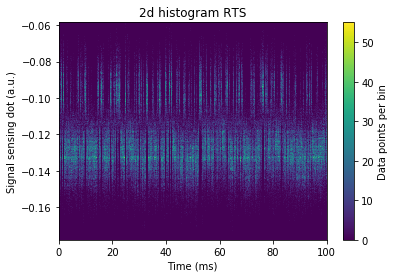

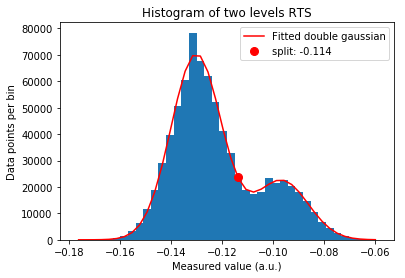

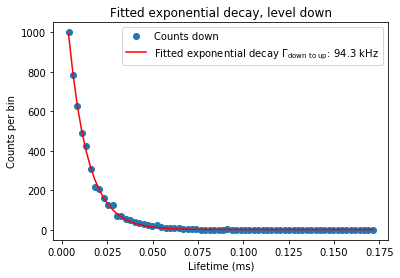

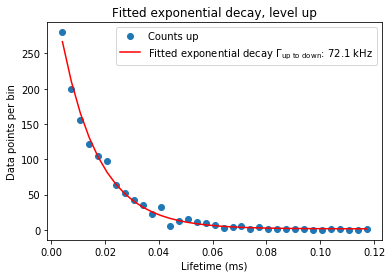

In [3]:
tunnelrates_RTS(rtsdata, samplerate=samplerate, min_sep = 1.0, min_duration = 20, num_bins = 40, fig=1, verbose=1)